In [2]:
#Importing Libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

C:\Users\Zaman Wahid\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Importing the dataset
dataset = pd.read_csv("dataset.csv")

In [4]:
dataset.describe()

,id,reason_for_absence,month_of _absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
dataset.head()

,id,reason_for_absence,month_of _absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absent_class
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,HOURS
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,NOT ABSENT
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,HOURS
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,HOURS
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,HOURS


In [6]:
#Dropping the unnecessary column named "absenteeism_time_in_hours"
dataset = dataset.drop(['absenteeism_time_in_hours'], axis=1)

dataset.head()

,id,reason_for_absence,month_of _absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absent_class
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,HOURS
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,NOT ABSENT
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,HOURS
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,HOURS
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,HOURS


In [7]:
#selecting the features and target variable
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [8]:
x.head()

,id,reason_for_absence,month_of _absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30


In [9]:
y.head()


0         HOURS
1    NOT ABSENT
2         HOURS
3         HOURS
4         HOURS
Name: absent_class, dtype: object

In [10]:
#Splitting the dataset for training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234, test_size=0.2)

In [11]:
#training the dataset
#Decision Tree
dtc = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 5, random_state =1)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [12]:
#Gradient Boosting Trees
gbt = GradientBoostingClassifier(max_leaf_nodes =12, learning_rate=0.01, random_state=1)
gbt.fit(x_train, y_train)
g_estimator = gbt.estimators_[73,0]

In [13]:
#Random Forest
rf = RandomForestClassifier(criterion = 'entropy', max_leaf_nodes = 10, random_state=1 )
rf.fit(x_train, y_train)
estimator = rf.estimators_[9]

In [14]:
#Prediction
dtc_predict = dtc.predict(x_test)
rf_predict = rf.predict(x_test)
gbt_predict = gbt.predict(x_test)

In [15]:
#accuracy
print("Decision Tree: ", accuracy_score(y_test, dtc_predict)*100)
print("Random Forest: ", accuracy_score(y_test, rf_predict)*100)
print("Gradient Boosted Tree: ", accuracy_score(y_test, gbt_predict)*100)

Decision Tree:  80.4054054054054
Random Forest:  82.43243243243244
Gradient Boosted Tree:  84.45945945945947


In [16]:
export_graphviz(dtc, out_file='tree.dot', 
               feature_names=x.columns,
               rounded =True,
               proportion = False,
               precision = 2,
               filled = True)

In [17]:
cnf_matrix = confusion_matrix(y_test, rf_predict)
print(cnf_matrix)

[[36 10  0  0]
 [12 78  0  0]
 [ 0  0  8  0]
 [ 2  2  0  0]]


In [18]:

TP = np.diag(cnf_matrix)

print("TP ",TP)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
print("FP",FP)
print("FN",FN)
print("TN",TN)


TP  [36 78  8  0]
FP [14 12  0  0]
FN [10 12  0  4]
TN [ 88  46 140 144]


In [19]:
#Recall Score
rcl = recall_score(y_test, rf_predict, average=None)
print(rcl)

[0.7826087  0.86666667 1.         0.        ]


In [20]:
#precision Score
prc = precision_score(y_test, rf_predict, average=None)
print(prc)

[0.72       0.86666667 1.         0.        ]


C:\Users\Zaman Wahid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#F1 Score
f1 = f1_score(y_test, gbt_predict, average=None)
print(f1)

[0.77083333 0.88268156 1.         0.4       ]


In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

Confusion matrix, without normalization
[[36 10  0  0]
 [12 78  0  0]
 [ 0  0  8  0]
 [ 2  2  0  0]]


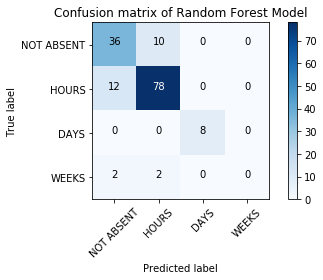

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NOT ABSENT','HOURS','DAYS','WEEKS'],
                      title='Confusion matrix of Random Forest Model')


plt.show()

In [24]:
export_graphviz(estimator, out_file='tree.dot',
               feature_names=x.columns,
               rounded = True,
               proportion = True,
               precision = 2,
               filled = True)

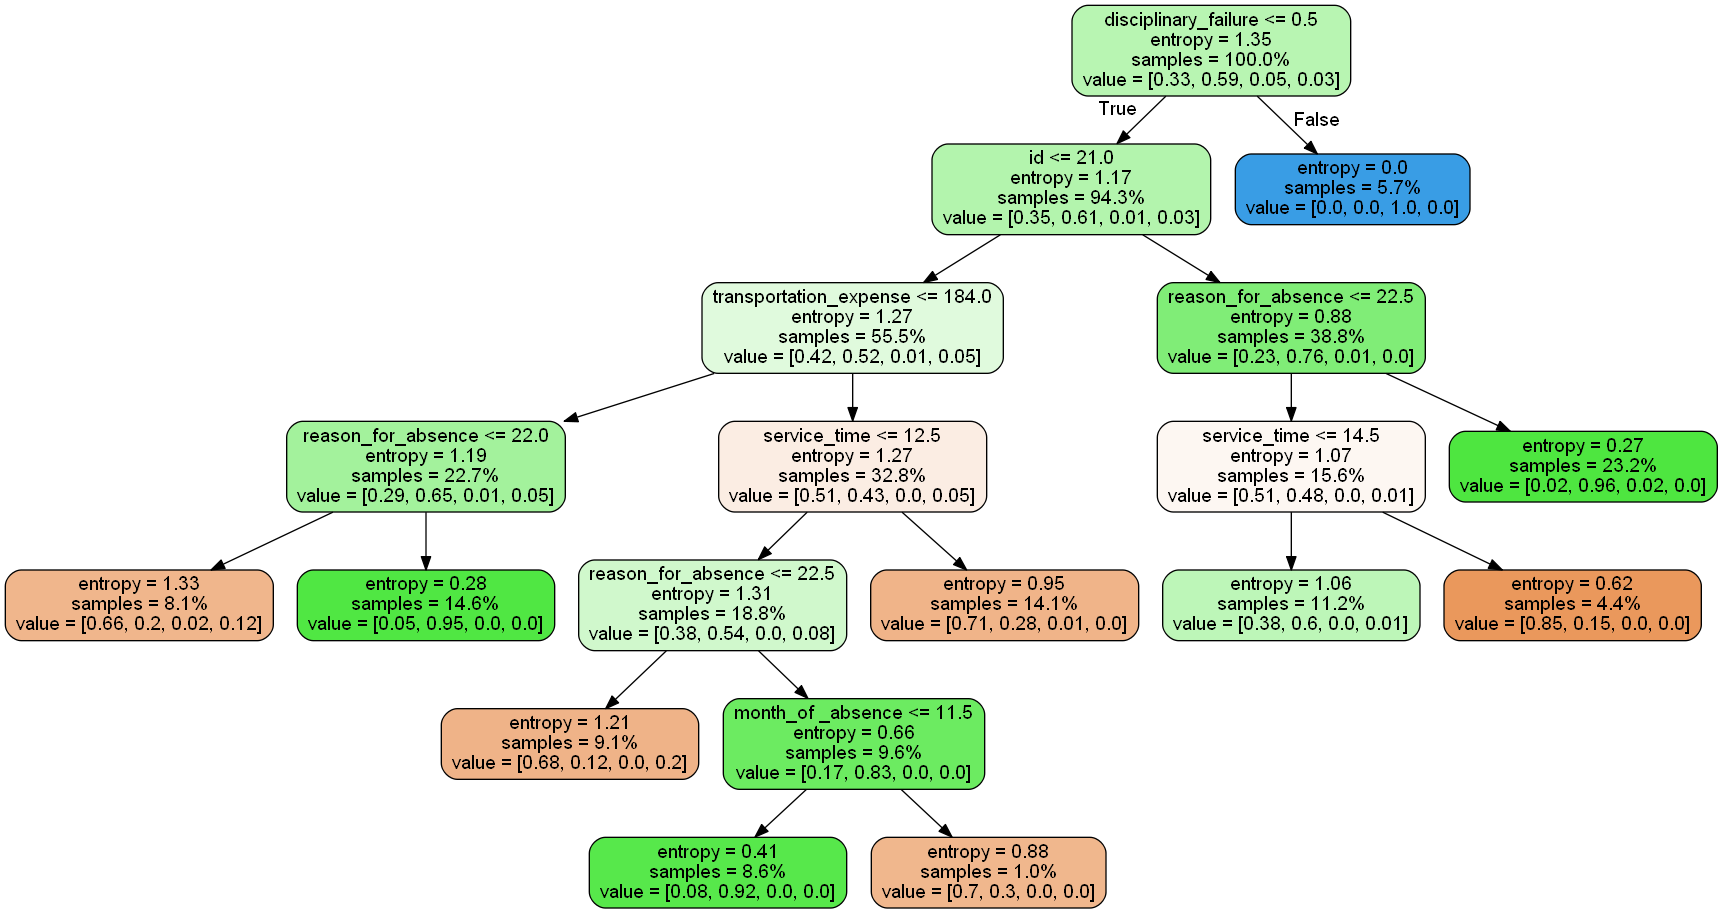

In [25]:
import os
from IPython.display import Image
os.system('dot -Tpng tree.dot -o tree.png')
Image(filename='tree.png')